# Notebook Assignment 2

In [1]:
import numpy as np

# Gestione immagini
from skimage import io # Per input/output
from skimage import transform # Per trasformazioni geometriche (es. resize)
from skimage import filters # Per filtri locali
from skimage import color # Per cambi colore

# Visualizzazione e interazione
from matplotlib import pyplot as plt
import ipywidgets as widgets

# Caricamento e visualizzazione immagine

Settiamo delle impostazioni per vedere le immagini meglio

In [2]:
plt.rcParams["figure.figsize"] = [15, 5]

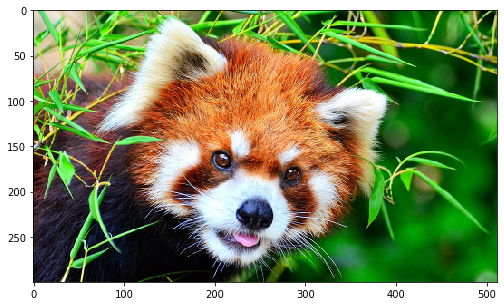

In [3]:
im = io.imread('images/redpanda.png')
plt.imshow(im); plt.show()

NB Skimage carica direttamente le immagini in numpy array, è comunque possibile usare:<br>

**Pillow**<br>
!conda install pillow<br>
from PIL import Image<br>
im = Image.open('images/redpanda_small.png')<br>
im = np.asarray(im) # Necessaria conversione di formato<br>
<br>
**OpenCV**<br>
!pip install opencv-python<br>
import cv2 as cv<br>
im = cv.imread('images/redpanda_small.png')<br>
im = im[::-1:-1:0] # Necessaria conversione BGR -> RGB

In [4]:
# Tipo di dato
type(im)

imageio.core.util.Array

A seconda della versione di ``scikit-image`` in uso, il dato potrebbe essere ``numpy.ndarray``, oppure ``imageio.core.utile.Array``.

La seconda è una sottoclasse della prima, e ne eredita attributi e metodi.

In [5]:
# Dimensioni immagine
im.shape

(300, 512, 4)

L'immagine è composta da 300 righe, 512 colonne e 4 canali: Red, Green, Blue, Alpha (trasparenza).

Vediamo a questo punto i singoli canali che compongono l'immagine:

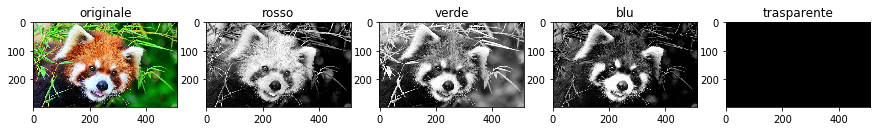

In [6]:
fig = plt.figure()
columns = 5
rows = 1
fig.add_subplot(rows, columns, 1)
plt.title("originale")
plt.imshow(im)
fig.add_subplot(rows, columns, 2)
plt.title("rosso")
plt.imshow(im[:,:,0], cmap = "gray")
fig.add_subplot(rows, columns, 3)
plt.title("verde")
plt.imshow(im[:,:,1], cmap = "gray")
fig.add_subplot(rows, columns, 4)
plt.title("blu")
plt.imshow(im[:,:,2], cmap = "gray")
fig.add_subplot(rows, columns, 5)
plt.title("trasparente")
plt.imshow(im[:,:,3], cmap = "gray")
plt.show()

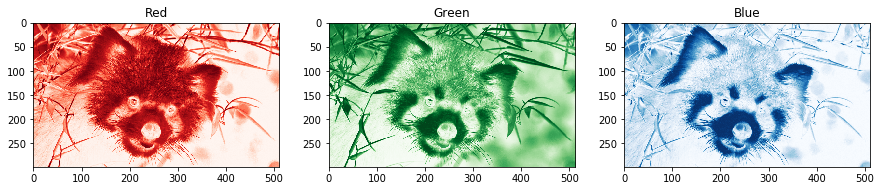

In [7]:
# Visualizzazione canali R,G,B con mappe colore
plt.subplot(1,3,1); plt.imshow(im[:,:,0], cmap='Reds'); plt.title('Red')
plt.subplot(1,3,2); plt.imshow(im[:,:,1], cmap='Greens'); plt.title('Green')
plt.subplot(1,3,3); plt.imshow(im[:,:,2], cmap='Blues'); plt.title('Blue')
plt.show()

I diversi colori vengono stampati attraverso l'indicazine del colore che viene fornita in terza posizione. Questa è semplicemente una visualizzazione alternativa, infatti i dati sono sempre le tre matrici bidimensionali, più la trasparenza eventuale, che codificano la quantità di ogni colore in ogni pixel.

L'immagine può essere eventualmente caricata in scala di grigi.

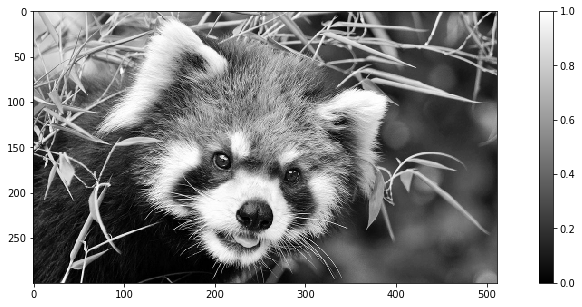

In [8]:
im = io.imread('images/redpanda.png', as_gray=True)
plt.imshow(im, cmap='gray'); plt.colorbar(); plt.show()

Il caricamento in scala di grigi può essere ottenuto con le altre librerie usando i seguenti comandi:
<br>
**Pillow**<br>
im = Image.open('images/redpanda.png').convert('L')<br>
https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
<br>
**OpenCV**<br>
im = cv.imread('images/redpanda.png', 0)

# Elaborazione puntuale immagine

Attraverso delle operazioni sui singoli pixel posso andare ad effettuare delle operazioni sulle immagini, come schiarirle o scurirle. In particolare, sommando un valore possiamo schiarire e lo stesso effetto lo otteniamo moltiplicando per un valore maggiore di 1 o elevando ad un valore minore di 1.

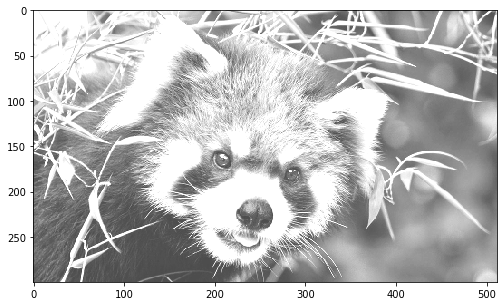

In [9]:
plt.imshow(im+0.3, cmap='gray'); plt.clim(0,1); plt.show()

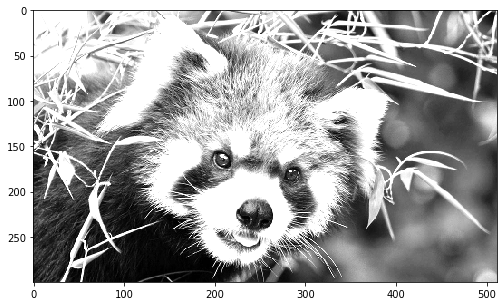

In [10]:
plt.imshow(im*1.5, cmap='gray'); plt.clim(0,1); plt.show()

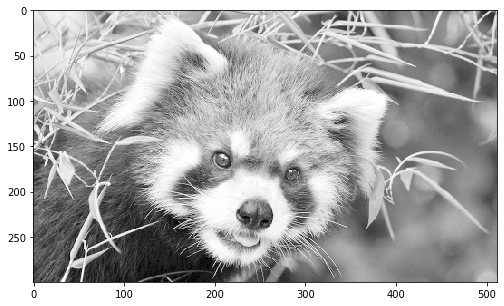

In [11]:
plt.imshow(im**.5, cmap='gray'); plt.clim(0,1); plt.show()

In [12]:
# Dimostrazione interattiva gamma
def gamma_correct(gamma=1.0):
    ax1 = plt.subplot(121)
    ax1.imshow(im**gamma, cmap='gray');

    ax2 = plt.subplot(122)
    xs = np.array(range(0,101))/100.0
    ys = xs**gamma
    ax2.plot([0,1],[0,1],dashes=[1, 1])
    ax2.plot(xs,ys)
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
gamma_slider = widgets.FloatLogSlider(min=-1, max=1, base=10, value=1.0)
widgets.interact(gamma_correct, gamma=gamma_slider)

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=1.0, min=-1.0), Output()), _dom_class…

<function __main__.gamma_correct(gamma=1.0)>

# Ridimensionamento

Volendo possiamo andare a ridimensionare le immagini, andando a modificarne le dimensioni.

In [13]:
fog = io.imread('images/fog.jpg', as_gray=True)
fog.shape

(2616, 3488)

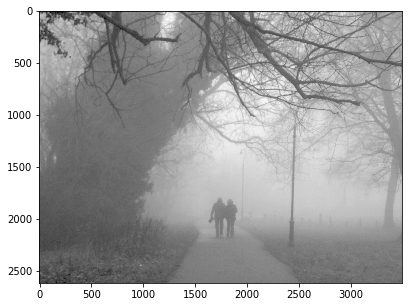

In [14]:
plt.imshow(fog, cmap='gray'); plt.show()

In [15]:
fog.shape

(2616, 3488)

In [16]:
# Calcolo nuove dimensioni (30%)
new_shape = (int(fog.shape[0]*0.3), int(fog.shape[1]*0.3))

In [17]:
new_shape

(784, 1046)

In [18]:
fog_small = transform.resize(fog, new_shape)

In [19]:
fog_small.shape

(784, 1046)

# Filtraggio (operazione di elaborazione locale)

Il risultato dipende dai valori che hanno i pixel che gli stanno intorno.

Operazione di sfocatura dell'immagine, che otteniamo andando estrarre il valore mediano dall'intorno di ciascun pixel; andiamo infatti ad estrarre il 50esimo percentile.

C:\Users\dexte\AppData\Roaming\Python\Python37\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


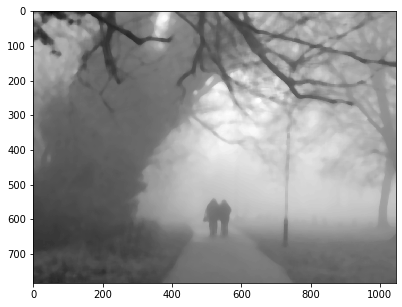

In [20]:
se = np.ones((15,15)) # elemento strutturante
fog_order = filters.rank.percentile(fog_small, se, p0=0.5)
plt.imshow(fog_order, cmap='gray'); plt.show()

Operazione per andare ad estrarre quelli che sono gli angoli presenti all'interno dell'immagine. All'immagine viene applicato il filtro di Sobel, che calcola direttamente la magnitudine degli edge in tutte le direzioni.

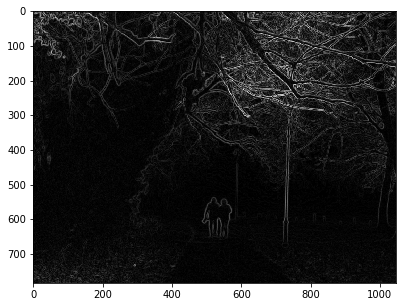

In [21]:
# Filtro lineare per estrazione edge
fog_edge = filters.sobel(fog_small)
plt.imshow(fog_edge, cmap='gray'); plt.show()

# Assignment - Unsharp Mask

L'obiettivo dell'esercizio è migliorare la definizione degli elementi che risultano non avere dei contorni definiti. Questo si concretiza nell'andare a creare una unsharping mask per l'immagine.

Per arrivare al risultato finale verranno effettuati i seguenti passaggi:

1. Prendo segnale (immagine) e aggiungo effetto blur con un filtro gaussiano.
2. Calcolo differenza tra segnale originale e quello ottenuto (ottengo quindi Unsharp Mask).
3. Sommo la maschera alla mia immagine originaria.

Con questa procedura, si riescono ad ottenere delle  immagini con contorni più nitidi e distinti.

**SFOCATURA**

La sfocatura viene fatta con un filtro gaussiano; questo non fa altro che prendere ogni segnale in ingresso e ne fa la convoluzione con una funzione gaussiana, di cui noi decidiamo la sigma.
Ci sono poi dei parametri che possiamo modificare:

1. *sigma* - possiamo assengnare il valore che vogliamo e al suo aumento, aumenta anche il grado di sfocatura dell'immagine.
2. *mode* - serve per gestire i bordi; per questo parametro una netta differenza è visibile tra mode = constant e mode = nearest. Con *constant*, il bordo risulta avere una dissolvenza nera, mentre con *nearest*, il bordo risulta nero e nitido.



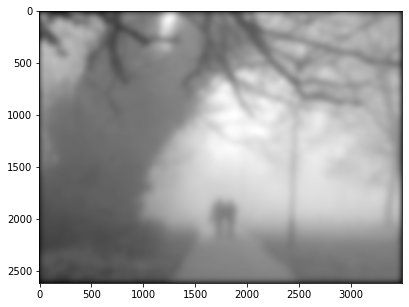

In [22]:
filtro1 = filters.gaussian(image = fog, sigma = 30, mode = 'constant')
plt.imshow(filtro1,cmap='gray')

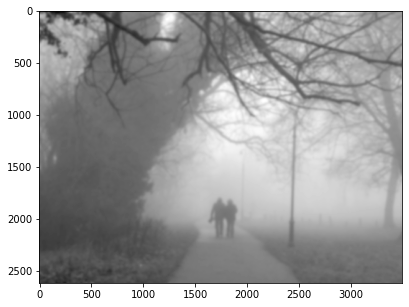

In [23]:
filtro2 = filters.gaussian(image = fog, sigma = 10, mode = 'nearest')
plt.imshow(filtro2,cmap='gray')

**DIFFERENZA**

Fare la differenza, vuol dire andare a togliere all'immagine (o segnale) originale il filtro che abbiamo ottenuto e dato che il filtro tende ad uniformare le zone in cui gli stacchi di colore sono più evidenti, andare a fare la differenza tra l'immagine originale e il filtro, vuol dire ottenere solo i dettagli della nostra immagine.

La differenza quindi sarà diversa a seconda del tipo trasformata guassiana che abbiamo utilizzato. Dai due risultati sottostanti si può notare come siano più evidenti i dettagli nella prima immagine, frutto della differenza con l'immagine filtrata con filtraggio gaussiano di sigma maggiore.

Per quanto riguarda i bordi, quelli con parametro mode = constant risultano essere sfocati. Questo effetto può essere desiderato o meno, a seconda dei casi.

Le immagini ottenute dalla differenza sono le *maschere di unsharpening* che volevamo ottenere.

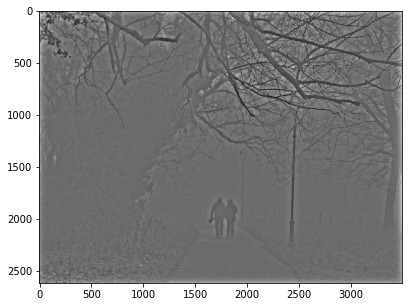

In [24]:
sharp_mask1 = fog - filtro1
plt.imshow(sharp_mask1,cmap='gray')

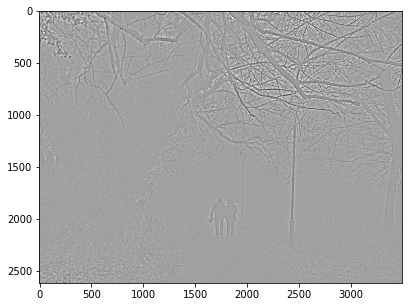

In [25]:
sharp_mask2 = fog - filtro2
plt.imshow(sharp_mask2,cmap='gray')

**RISULTATO**

Per arrivare al risultato finale dobbiamo sommare all'immagine originale la maschera di unsharp.

Otteniamo quindi qua sotto i due risultati frutto della somma con le due diverse maschere. Possiamo notare che i dettagli risultano essere leggermente più marcati nel secondo risultato, dove abbiamo usato un valore di sigma minore per l'effetto di sfocatura; nella stessa immagine possiamo vedere che l'informazione sul colore risulta essere maggiormente alterata rispetto a quanto lo sia nell'immagine sopra.

In [26]:
sharped_image1 = fog + sharp_mask1
sharped_image2 = fog + sharp_mask2

<Figure size 1080x360 with 0 Axes>

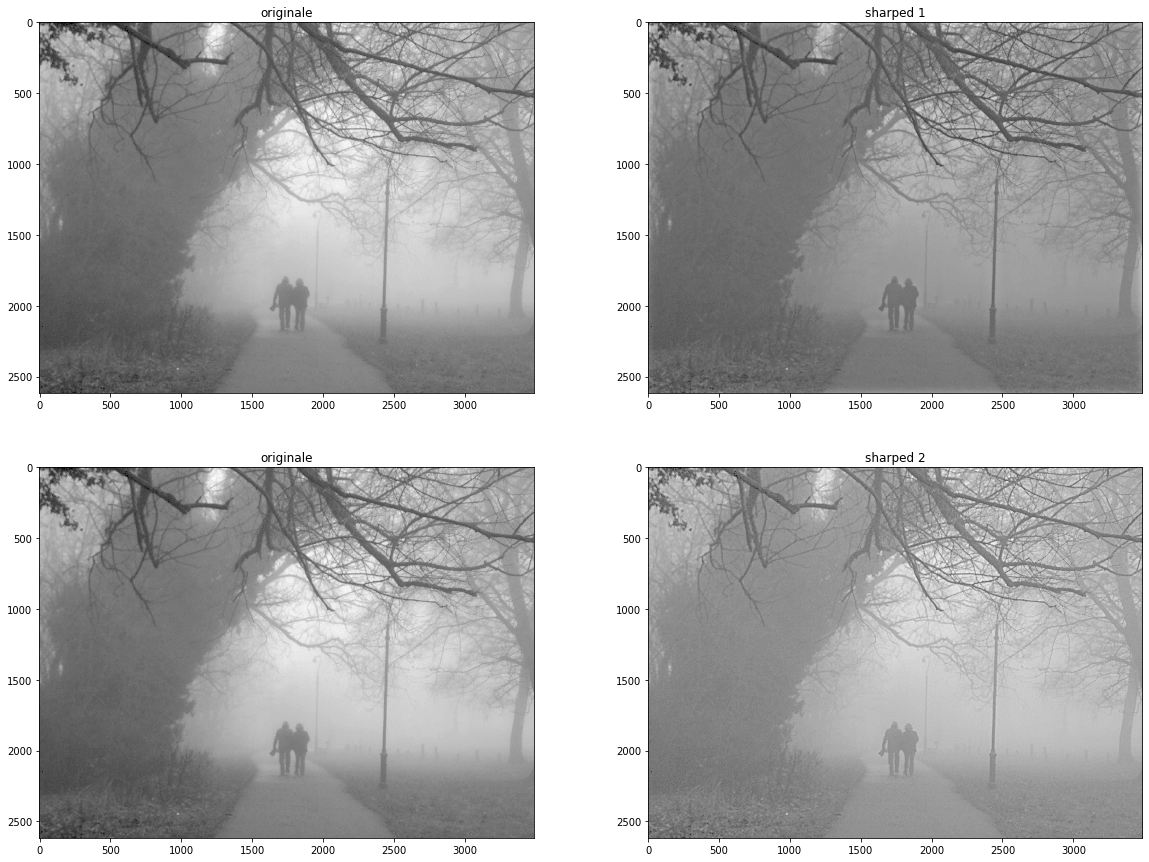

In [28]:
fig = plt.figure()
columns = 2
rows = 2
fig = plt.figure(figsize = (20, 15))
fig.add_subplot(rows, columns, 1)
plt.title("originale")
plt.imshow(fog, cmap = 'gray')
fig.add_subplot(rows, columns, 2)
plt.title("sharped 1")
plt.imshow(sharped_image1, cmap = "gray")
fig.add_subplot(rows, columns, 3)
plt.title("originale")
plt.imshow(fog, cmap = "gray")
fig.add_subplot(rows, columns, 4)
plt.title("sharped 2")
plt.imshow(sharped_image2, cmap = "gray")
plt.show()

Il cambiamento dei colori è dato dal fatto che quando andiamo a fare la somma della maschera più l'immagine, questi valori eccedono il limite e una volta che tutti sono automaticamente rinormalizzati tra 0 e 1 e per questo non hanno più il valore precedente.